In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from pathlib import Path
import napari

from cell_paint_seg.utils import get_id_to_path, get_id_from_name_96
from cell_paint_seg.image_io import read_ims, read_seg

# Convert to 3 channel images for cellpose

In [51]:
def get_id_from_name(name):
    final_part = name.split('_')[-1]
    s = int(final_part[1:4])
    s -= 1

    w = s // 3
    f = s % 3 + 1

    row_num = w // 10
    col_num = w % 10

    if row_num % 2 == 1:
        col_num = 9 - col_num

    col_num += 2

    row_num_to_letter = {0: "B", 1: "C", 2: "D", 3: "E", 4: "F", 5: "G"}
    row_letter = row_num_to_letter[row_num]

    e = 6

    id = f"e{e}_w{row_letter}{col_num}_f{f}"

    return id



In [52]:
dir_tif = "/Users/thomasathey/Documents/shavit-lab/fraenkel/papers/cvpr/data/all/tifs/Experiment6_DB_unmixed_zstacked"
out_dir = "/Users/thomasathey/Documents/shavit-lab/fraenkel/papers/cvpr/data/all/tifs_3channel_temp2"

dir_tif = Path(dir_tif)
out_dir = Path(out_dir)
channels = ["ER", "DNA", "Mito", "Actin", "RNA", "Golgi/membrane"]

id_to_path = get_id_to_path(dir_tif, tag=".tif", id_from_name=get_id_from_name)

for id in id_to_path.keys():
    ims = read_ims(id_to_path[id])
    ims = [np.amax(ims[i], axis=-1) for i in [3, 4, 1]]
    im_3channel = np.stack(ims, axis=-1)
    
    fname = out_dir / f"{id}.tif"
    # print(fname)
    io.imsave(fname, im_3channel)


/var/folders/gy/jk_d3cx54vj18w9sm6x3sg_80000gn/T/ipykernel_386/3888497064.py:17: UserWarning: /Users/thomasathey/Documents/shavit-lab/fraenkel/papers/cvpr/data/all/tifs_3channel_temp2/e6_wD5_f1.tif is a low contrast image
  io.imsave(fname, im_3channel)
/var/folders/gy/jk_d3cx54vj18w9sm6x3sg_80000gn/T/ipykernel_386/3888497064.py:17: UserWarning: /Users/thomasathey/Documents/shavit-lab/fraenkel/papers/cvpr/data/all/tifs_3channel_temp2/e6_wD8_f1.tif is a low contrast image
  io.imsave(fname, im_3channel)
/var/folders/gy/jk_d3cx54vj18w9sm6x3sg_80000gn/T/ipykernel_386/3888497064.py:17: UserWarning: /Users/thomasathey/Documents/shavit-lab/fraenkel/papers/cvpr/data/all/tifs_3channel_temp2/e6_wF9_f1.tif is a low contrast image
  io.imsave(fname, im_3channel)


# Segment

python -m cellpose --dir /Users/thomasathey/Documents/shavit-lab/fraenkel/papers/cvpr/data/all/tifs_3channel_temp --diameter 0. --pretrained_model cyto3 --chan 2 --chan2 3 --no_npy --save_png --verbose

In [54]:
seg = read_seg(
    "/Users/thomasathey/Documents/shavit-lab/fraenkel/papers/cvpr/data/all/tifs_3channel_temp/e5_wB4_f1_cp_masks.png"
)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

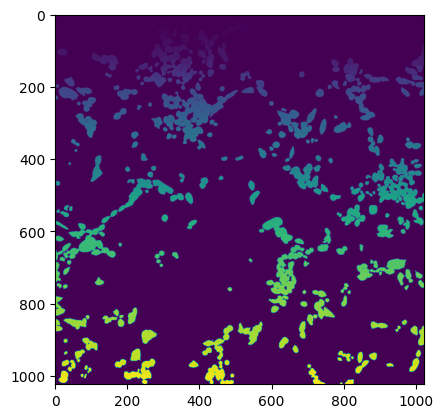

In [55]:
plt.imshow(seg)